___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Lab - 2 (CNN) <br><br>Assignment-2 Solution<br><br>Image Classification with CNN<br><h1>


# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [6]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [7]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [8]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")   

There are  60000 images in the training dataset
There are  10000 images in the test dataset


**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [9]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [10]:
X_train[0].shape

(28, 28)

In [11]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

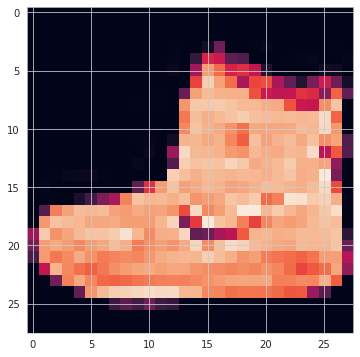

In [12]:
plt.imshow(X_train[0])

In [13]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [14]:
y_train[0]

9

In [15]:
classes[9]

'Ankle boot'

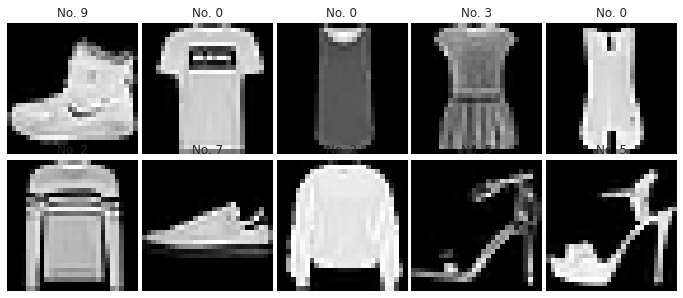

In [16]:
num_rows, num_cols = 2, 5
f, ax = plt.subplots(2, 5, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.02}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].set_title('No. %d' % y_train[image_index])
        ax[r,c].imshow( X_train[image_index], cmap='gray')
        
plt.tight_layout()
plt.show()
plt.close()

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [17]:
X_train.min()

0

In [18]:
X_train.max()

255

In [19]:
X_train = X_train/255
X_test = X_test/255

In [20]:
X_train.min()

0.0

In [21]:
X_train.max()

1.0

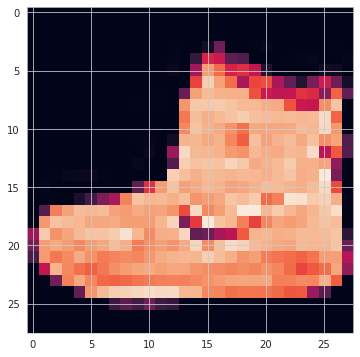

In [22]:
plt.imshow(X_train[0])

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [23]:
X_train.shape

(60000, 28, 28)

In [24]:
X_train.reshape(60000, 28, 28, 1).shape

(60000, 28, 28, 1)

In [25]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [26]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [27]:
from tensorflow.keras.utils import to_categorical

In [28]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [29]:
y_train.shape

(60000,)

In [30]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [31]:
y_train[8]

5

In [32]:
Y_train[8]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Modeling

## Create The Model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (3,3) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [34]:
model = Sequential()
model.add(Conv2D(filters=28, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 256)               1211648   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                        

In [36]:
((3* 3 * 1) + 1) * 28

280

## Model Training

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [37]:
from tensorflow.keras.callbacks import EarlyStopping

In [38]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights = True)

In [39]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 19s 4ms/step - loss: 0.4212 - accuracy: 0.8541 - val_loss: 0.3110 - val_accuracy: 0.8913
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3027 - accuracy: 0.8945 - val_loss: 0.3116 - val_accuracy: 0.8936
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2799 - accuracy: 0.9018 - val_loss: 0.2902 - val_accuracy: 0.8976
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2715 - accuracy: 0.9062 - val_loss: 0.2923 - val_accuracy: 0.9006
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2697 - accuracy: 0.9073 - val_loss: 0.2950 - val_accuracy: 0.8986
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2649 - accuracy: 0.9094 - val_loss: 0.3049 - val_accuracy: 0.8940


**TASK 7: Plot values of metrics you used in your model.**

In [40]:
model.metrics_names

['loss', 'accuracy']

In [41]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.421,0.854,0.311,0.891
1,0.303,0.895,0.312,0.894
2,0.280,0.902,0.290,0.898
3,0.272,0.906,0.292,0.901
4,0.270,0.907,0.295,0.899


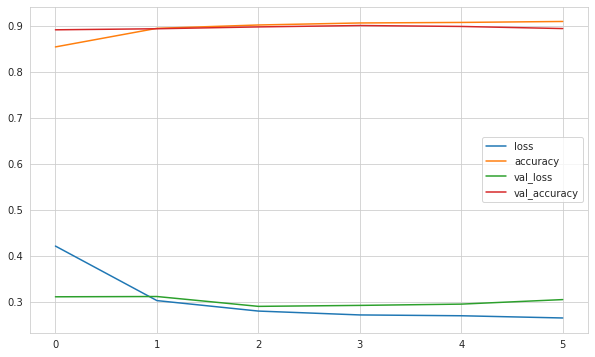

In [42]:
summary.plot();

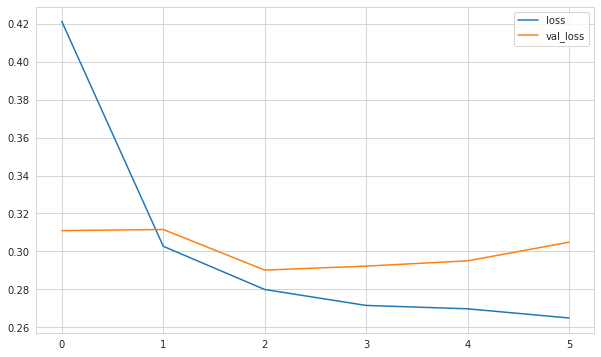

In [43]:
summary[["loss", "val_loss"]].plot();

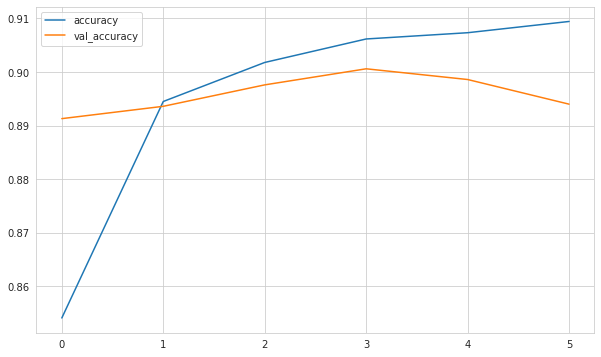

In [44]:
summary[["accuracy", "val_accuracy"]].plot();

In [4]:
## Model 2

In [45]:
model2 = Sequential()
model2.add(Conv2D(filters=28, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu'))
model2.add(MaxPool2D(pool_size=(3, 3),strides=(1, 1)))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.4))
model2.add(Dense(10, activation='softmax'))

model2.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [46]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 28)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 16128)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               2064512   
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                      

In [47]:
model2.fit(X_train, Y_train, batch_size=32, epochs=15, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4458 - accuracy: 0.8471 - val_loss: 0.3257 - val_accuracy: 0.8859
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3302 - accuracy: 0.8873 - val_loss: 0.3123 - val_accuracy: 0.8900
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3090 - accuracy: 0.8945 - val_loss: 0.3037 - val_accuracy: 0.8933
Epoch 4/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3032 - accuracy: 0.8972 - val_loss: 0.2950 - val_accuracy: 0.8973
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3007 - accuracy: 0.8983 - val_loss: 0.3073 - val_accuracy: 0.8928
Epoch 6/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2962 - accuracy: 0.9001 - val_loss: 0.3235 - val_accuracy: 0.8936
Epoch 7/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2979 - accuracy: 0.9004 - val_loss: 0.3050 - val_accuracy:

In [48]:
summary = pd.DataFrame(model2.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.446,0.847,0.326,0.886
1,0.330,0.887,0.312,0.890
2,0.309,0.895,0.304,0.893
3,0.303,0.897,0.295,0.897
4,0.301,0.898,0.307,0.893


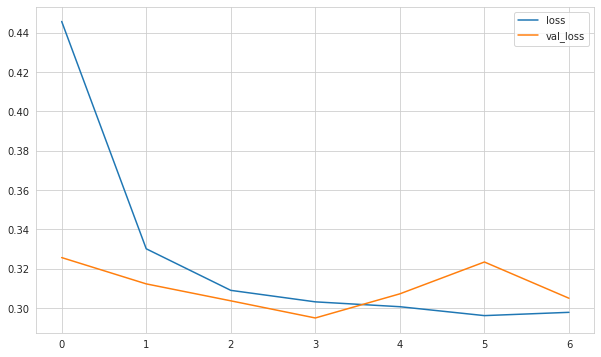

In [49]:
summary[["loss", "val_loss"]].plot();

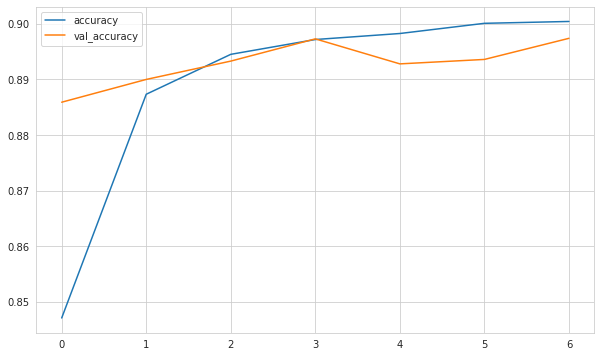

In [50]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [51]:
from sklearn.metrics import classification_report, confusion_matrix

In [52]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2902 - accuracy: 0.8976


[0.29016125202178955, 0.897599995136261]

In [53]:
model2.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2950 - accuracy: 0.8973


[0.29499512910842896, 0.8973000049591064]

In [54]:
score = model2.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.29499512910842896
Test accuracy: 0.8973000049591064


In [55]:
pred_prob = model2.predict(X_test)
pred_prob

array([[3.9132793e-08, 2.5458209e-09, 8.7304954e-08, ..., 2.4208365e-04,
        1.4907877e-05, 9.9697757e-01],
       [4.4729200e-06, 8.5406891e-15, 9.9997854e-01, ..., 1.1089317e-11,
        1.3180587e-09, 3.0328344e-13],
       [1.2929364e-07, 9.9999952e-01, 2.2905049e-09, ..., 2.5508458e-09,
        8.6461869e-09, 3.2459031e-09],
       ...,
       [3.6601396e-08, 2.2504474e-16, 1.4043755e-08, ..., 8.1132247e-11,
        9.9999905e-01, 1.2497546e-11],
       [3.2190536e-07, 9.9996161e-01, 3.5367473e-09, ..., 2.6142944e-08,
        5.8106625e-08, 7.0257137e-08],
       [2.1714082e-03, 1.9879222e-05, 9.1948602e-03, ..., 2.5752288e-01,
        4.9918652e-02, 3.4608435e-02]], dtype=float32)

In [56]:
pred_prob.shape

(10000, 10)

In [57]:
pred_prob[0]

array([3.9132793e-08, 2.5458209e-09, 8.7304954e-08, 3.2918503e-08,
       1.3116097e-08, 2.7641801e-03, 1.1747421e-06, 2.4208365e-04,
       1.4907877e-05, 9.9697757e-01], dtype=float32)

In [58]:
np.argmax(pred_prob[0])

9

In [59]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [60]:
y_pred.shape

(10000,)

In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1000
           1       0.99      0.97      0.98      1000
           2       0.82      0.85      0.83      1000
           3       0.91      0.88      0.89      1000
           4       0.85      0.81      0.83      1000
           5       0.96      0.98      0.97      1000
           6       0.70      0.71      0.71      1000
           7       0.95      0.96      0.96      1000
           8       0.98      0.97      0.98      1000
           9       0.98      0.95      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [62]:
print(confusion_matrix(y_test, y_pred))

[[872   0  21  13   5   2  83   0   4   0]
 [  0 973   0  15   2   1   7   0   2   0]
 [ 13   1 846   7  51   0  79   0   3   0]
 [ 25   6  16 881  29   0  43   0   0   0]
 [  1   0  78  25 814   0  82   0   0   0]
 [  0   0   0   0   0 983   0  12   0   5]
 [120   0  71  25  57   0 714   0  13   0]
 [  0   0   0   0   0  21   0 964   0  15]
 [  2   2   0   5   1   5   8   3 974   0]
 [  0   0   0   0   0   9   0  38   1 952]]


In [63]:
(y_test != y_pred).sum()

1027

## Prediction

In [64]:
samples=[X_test[5], X_test[10], X_test[15]]

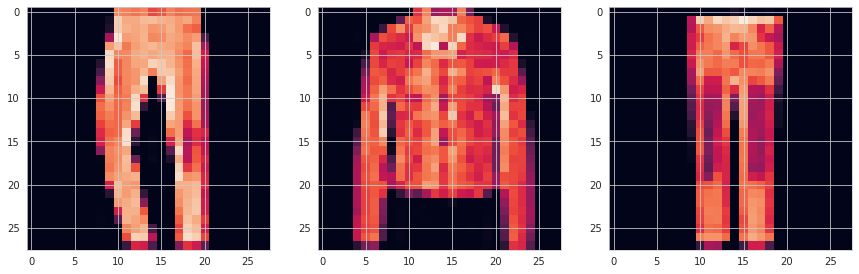

In [65]:
plt.figure(figsize = (20,5))
index=1
for i in samples:
    plt.subplot(1,4,index)
    plt.imshow(i.reshape(28,28))
    index += 1

In [66]:
samples = np.array(samples)
samples

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [67]:
samples.shape

(3, 28, 28, 1)

In [68]:
pred_prob = model2.predict(samples)
pred_prob

array([[2.27497731e-06, 9.99991655e-01, 3.40246515e-07, 3.13461896e-06,
        1.30125659e-06, 2.42484703e-07, 6.69547319e-07, 4.27998685e-08,
        3.54471808e-07, 4.53662423e-08],
       [4.16580966e-04, 2.48377164e-05, 1.01119280e-01, 5.26903750e-05,
        8.49844158e-01, 2.02757819e-05, 4.83523607e-02, 1.22987683e-06,
        1.60679483e-04, 7.86168857e-06],
       [2.55864034e-05, 9.99363720e-01, 1.34796346e-06, 4.53841349e-04,
        1.19642835e-04, 6.48277762e-07, 3.26983027e-05, 2.38143954e-07,
        9.97266170e-07, 1.24329279e-06]], dtype=float32)

In [69]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([1, 4, 1])

In [70]:
y_test[5:16:5]

array([1, 4, 1], dtype=uint8)

In [71]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [72]:
for i in y_test[5:16:5]:
    print(classes[i])

Trouser
Coat
Trouser


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___